## Template Matching

### What is our goal?

The goal, given a query image of Waldo and the puzzle image, is to find Waldo in in the puzzle image and highlight his location. Don't know who is Waldo and what the puzzle is? Don't worry, an example is shown below!

We require two images to build our Python script to perform template matching.

The first image is the Where’s Waldo puzzle that we are going to solve. The second image is a template of what Waldo looks like.

Let us begin by importing the necessary packages. (Note: % matplotlib inline lets you display your plot within this notebook)

In [2]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

### Now let's take a look at Waldo! 

We are going to locate the image file of Waldo, read it, print it's dimensions and then display the image within the notebook.

Height of Template: 35 & Width of Template: 24


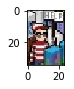

In [3]:
# Insert the location of the images
puzzle_address = 'Convention.jpg'
waldo_address = 'Wally.png'

# load the puzzle and waldo images
puzzle = cv2.imread(puzzle_address)
waldo = cv2.imread(waldo_address)
(waldoHeight, waldoWidth) = waldo.shape[:2]

# Display the dimensions and plot the image of Waldo
print("Height of Template: %d & Width of Template: %d" %(waldoHeight, waldoWidth))

# cv2 reads the image in BGR, we need to convert it to RGB values to see the plot. 
# What happens if you do not convert?
# Go ahead and try it out. Comment the next line and run the cell.
waldo_rgb = cv2.cvtColor(waldo,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(1,1))
plt.imshow(waldo_rgb)

### Let's take a look at Waldo's convention.

We need to find Waldo within this picture. Can you find Waldo in the picture with your eyeballs?

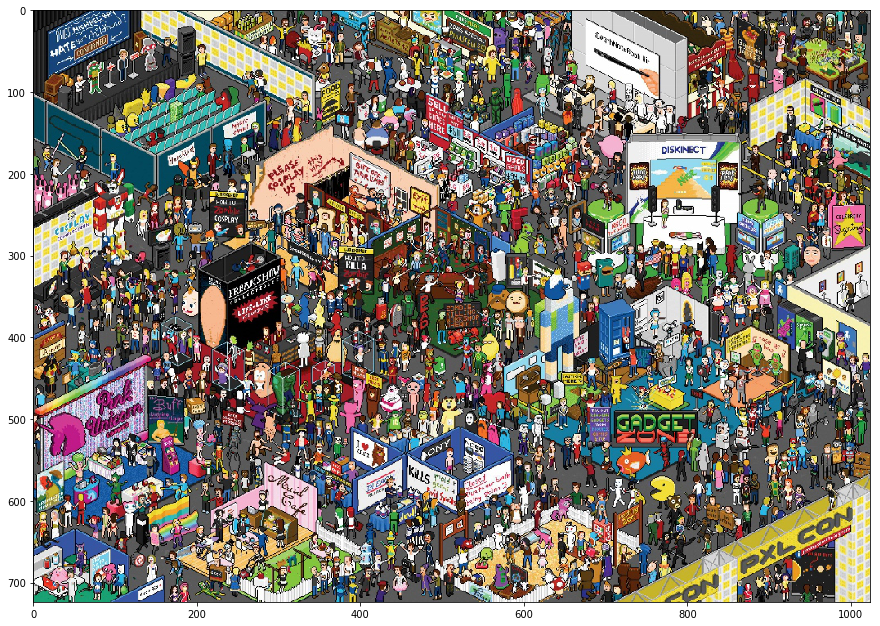

In [3]:
plt.figure(figsize=(15,15))
puzzle_rgb = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)

plt.imshow(puzzle_rgb)

We are now ready to perform our template matching. We accomplish our template matching in the next cell by using the cv2.matchTemplate function. This method requires three parameters. The first is our puzzle image, the image that contains what we are searching for. The second is our query image, waldo. This image is contained within the puzzle image and we are looking to pinpoint its location. Finally, the third argument is our template matching method. There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag cv2.TM_CCOEFF. You can find the formulas and read about other template matching methods right here - https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html

So what exactly is the cv2.matchTemplate function doing?

Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. Regions with sufficiently high correlation can be considered “matches” for our waldo template.

In [30]:
# find the waldo in the puzzle
result = cv2.matchTemplate(puzzle, waldo, cv2.TM_CCOEFF)

Now what we need to do is use a call to cv2.minMaxLoc to find where our "good" matches are among the discovered matches above.

That’s really all there is to template matching!

In [29]:
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

NameError: name 'result' is not defined

Great, we've grabbed the locations of our best matches. The two variables minLoc and maxLoc now contain the top-left (x,y) co-ordinates of the image that contains the best match based on our sliding window.

Given the top-left co-ordinates, we can compute the bottom-right (x,y) co-ordinates based on the width and height of Waldo that we found earlier!

After finding both these co-ordinate points, we grab our desired piece from the large image of the convention and store it in the roi variable (Region Of Interest).

In [24]:
# grab the bounding box of waldo and extract him from
# the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]

NameError: name 'maxLoc' is not defined

The next step is to construct a transparent layer that darkens everything in the image but Waldo. We do this by first initializing a mask with the same shape as our puzzle filled with zeros. By filling the image with zeros we are creating an image filled with black.

In order to create the transparent effect, we use the cv2.addWeighted function. The first parameter is our puzzle image, and the second parameter indicates that we want it to contribute to 25% of our output image.  We then supply our mask as the third parameter, allowing it to contribute to 75% of our output image. By utilizing the cv2.addWeighted function we have been able to create the transparency effect.

In [7]:
# construct a darkened transparent 'layer' to darken everything
# in the puzzle except for waldo
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)

However, we still need to highlight the Waldo region! That’s simple enough:

Here we are just placing the Waldo ROI back into the original image using some NumPy array slicing techniques. Nothing to it.

Finally, the last 2 lines display the results of our work by displaying our Waldo query and puzzle image on screen and waiting for a key press.

In [5]:
puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
# display the images
cv2.imwrite("Puzzle_Result.jpg", puzzle)
result_rgb = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(result_rgb)

NameError: name 'roi' is not defined

Hurray! We have found Waldo. Good job. 

### Now, after running all the above, answer this!

1) How can you modify the above approach if the template image Waldo was cropped from the same puzzle/very similar but has a different dimension from the picture of Waldo hidden in the puzzle? We will be left with a false detection. Can you think of a brute force approach to correct this?

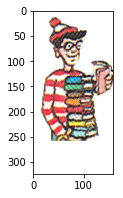

In [9]:
plt.figure(figsize = (3,3))
#load and convert image
plt.imshow(cv2.cvtColor(cv2.imread('waldo_books_dim.jpg'), cv2.COLOR_BGR2RGB)) 

# Find Waldo in this puzzle!

In [7]:
puzzle2 = cv2.cvtColor(cv2.imread('waldo_zoo.jpg'), cv2.COLOR_BGR2RGB)
waldo2 = cv2.cvtColor(cv2.imread('waldo_books_dim.jpg'), cv2.COLOR_BGR2RGB)

(waldo2Height, waldo2Width) = waldo2.shape[:2]
(puzzle2Height, puzzle2Width) = puzzle2.shape[:2]
# Display the dimensions and plot the image of Waldo2
print("Height of Template: %d & Width of Template: %d" %(waldo2Height, waldo2Width))
print("Height of Puzzle: %d & Width of Puzzle: %d" %(puzzle2Height, puzzle2Width))

Height of Template: 324 & Width of Template: 158
Height of Puzzle: 2340 & Width of Puzzle: 1700


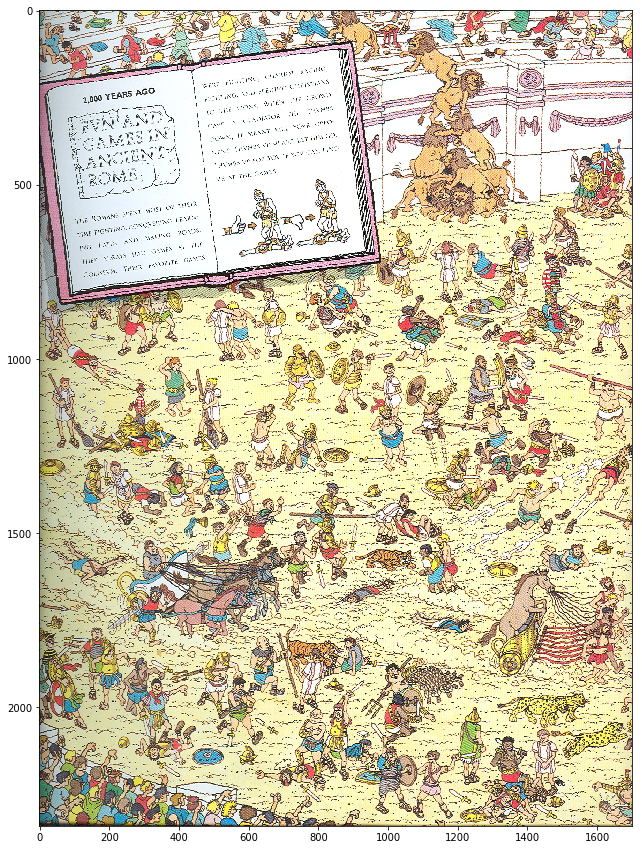

In [10]:
plt.figure(figsize = (15,15))
#load and covert image
plt.imshow(cv2.cvtColor(cv2.imread('waldo_zoo.jpg'), cv2.COLOR_BGR2RGB))

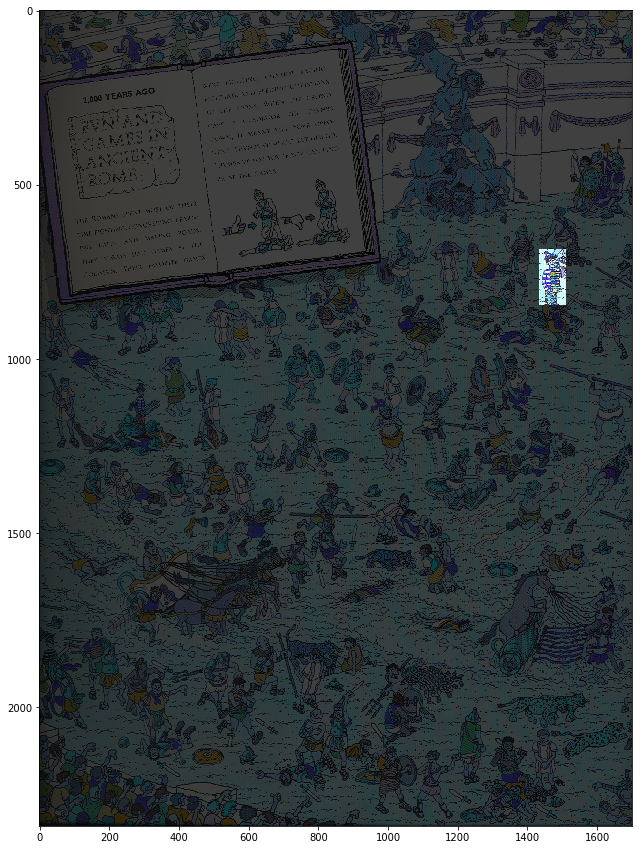

In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
% matplotlib inline


puzzle2 = cv2.cvtColor(cv2.imread('waldo_zoo.jpg'), cv2.COLOR_BGR2RGB)
waldo2 = cv2.cvtColor(cv2.imread('waldo_books_dim.jpg'), cv2.COLOR_BGR2RGB)
(waldo2Height, waldo2Width) = waldo2.shape[:2]
(puzzle2Height, puzzle2Width) = puzzle2.shape[:2]


# find the waldo in the puzzle
resultMax = None
best_maxVal = 0
best_maxLoc = (0,0)
best_size = 0;

# since the size of the template can potentially not matching waldo in the puzzle
# we need to try downsizing to find the best size

for i in range(25,65,1):
    smallWaldo = cv2.resize(waldo2, (0,0), fx = i/100, fy = i/100)
    resultTemp = cv2.matchTemplate(puzzle2, smallWaldo, cv2.TM_CCOEFF)
    (_, maxValue2, minLoc2, maxLoc2) = cv2.minMaxLoc(resultTemp)
    if maxValue2 > best_maxVal:
        best_maxVal = maxValue2
        best_maxLoc = maxLoc2
        best_size = i/100
        #print('best size: %d',best_size)
        resultMax = resultTemp
        

#print('maxLoc : %d',best_maxLoc)      

# grab the bounding box of waldo and extract him from the puzzle image
topLeft2 = best_maxLoc
newWidth = int(waldo2Width*best_size)
newHeight = int(waldo2Height*best_size)
botRight2 = (topLeft2[0] + newWidth, topLeft2[1] + newHeight)


# all values on the other side must be interger 
roi2 = puzzle2[topLeft2[1]:botRight2[1], topLeft2[0]:botRight2[0]]

# construct a darkened transparent 'layer' to darken everything
# in the puzzle except for waldo
mask2 = np.zeros(puzzle2.shape, dtype = "uint8")
puzzle2 = cv2.addWeighted(puzzle2, 0.25, mask2, 0.75, 0)


puzzle2[topLeft2[1]:botRight2[1], topLeft2[0]:botRight2[0]] = roi2
    
# display the images
cv2.imwrite("Puzzle2_Result.jpg", puzzle2)
result2_rgb = cv2.cvtColor(puzzle2,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(result2_rgb)


### Bonus - The Man Who Mistook His Wife for a Hat (0 points)

When Oliver Sacks has his initial encounter with “the man who mistook his wife for a hat,” he explains
that Dr P. did not look at him in the normal way, but rather “made sudden strange fixations – on my
nose, on my right ear, down to my chin, up to my right eye – as if noting (even studying) these individual
features, but not seeing my whole face, its changing expressions, 'me' as a whole.”
Dr P. could experience the world only as small individual features. He was unable to group these lowlevel
features into high-level constructs. Sacks writes that he “had no sense whatever of a landscape or
a scene,” and when it came to recognizing people, “in the absence of obvious ‘markers,’ he was utterly
lost.” In many ways, Dr P. functioned like a computer, construing the world “by means of key features
and schematic relationships… without the reality being grasped at all.”
What tasks could Dr P. still accomplish by perceiving the world in this way? What tasks presented him
with the most difficulty? What does this suggest about the capabilities of computer vision?

In [ ]:
Dr.P can still accomplish the task of recognizing the lowlevel features 
for example recognizing eyes of different people.
The task that can be most diffcult is that Dr.P might not be able to
recognize face of a person if not given key features.
Also, he can not make connections between eyes, brows etc. of a person
The capabilities of computer vision is similar as what Dr.P can accomplish
by grasping the key features of the target, the computer is able to recognize 
the feature and match with the target. 